# Exercise

#### Do your work for this exercise in a notebook named explore. 
#### Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

#### For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. 
#### For both datasets you should choose a method of splitting your data and only explore the training split.



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import acquire
import prepare

In [24]:
# plotting defaults
plt.rc('figure', figsize=(11, 5))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
store_df = acquire.get_all_store_data()

In [3]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store_id       913000 non-null  int64  
 5   store_address  913000 non-null  object 
 6   store_city     913000 non-null  object 
 7   store_state    913000 non-null  object 
 8   store_zipcode  913000 non-null  int64  
 9   item_brand     913000 non-null  object 
 10  item_name      913000 non-null  object 
 11  item_price     913000 non-null  float64
 12  item_upc12     913000 non-null  int64  
 13  item_upc14     913000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 104.5+ MB


In [7]:
store_df = prepare.prep_store_data(store_df)
store_df

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,218.40
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday,125.55
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,453.60
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,294.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,34,21.0,619014,9,735 SW Military Dr,San Antonio,TX,78221,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,December,Sunday,87.57
2017-12-31,34,32.0,620840,10,8503 NW Military Hwy,San Antonio,TX,78231,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,December,Sunday,133.44
2017-12-31,35,55.0,622666,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,December,Sunday,285.45


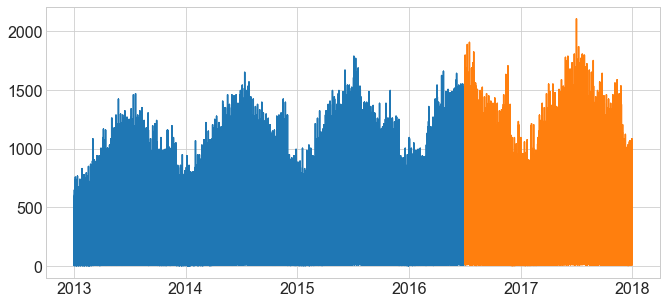

In [25]:
train_size = .70
n = store_df.shape[0]
test_start_index = round(train_size * n)

train = store_df[:test_start_index] # everything up (not including) to the test_start_index
test = store_df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

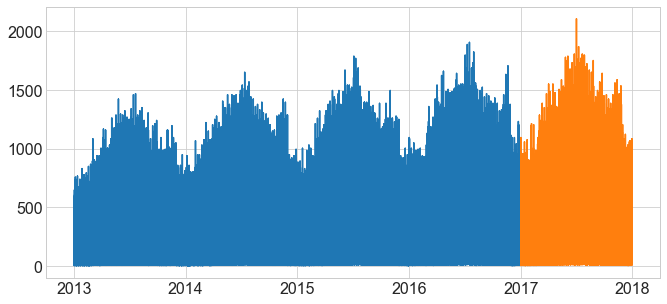

In [26]:
train = store_df[:'2016'] # includes 2016
test = store_df['2017']

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

### Visualizations

In [17]:
y = train.sales_total
y.head()

sale_date
2013-01-01     10.92
2013-01-01    218.40
2013-01-01    125.55
2013-01-01    453.60
2013-01-01    294.00
Name: sales_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

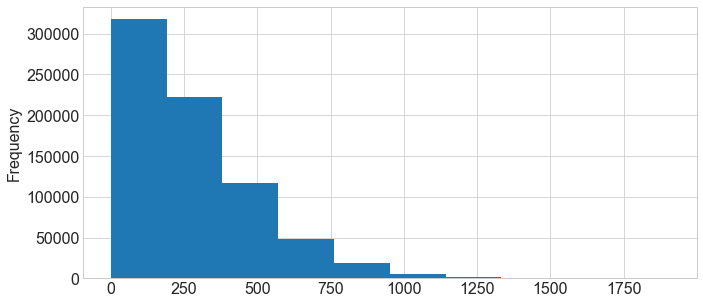

In [27]:
train.sales_total.plot.hist()

<AxesSubplot:xlabel='day_of_week'>

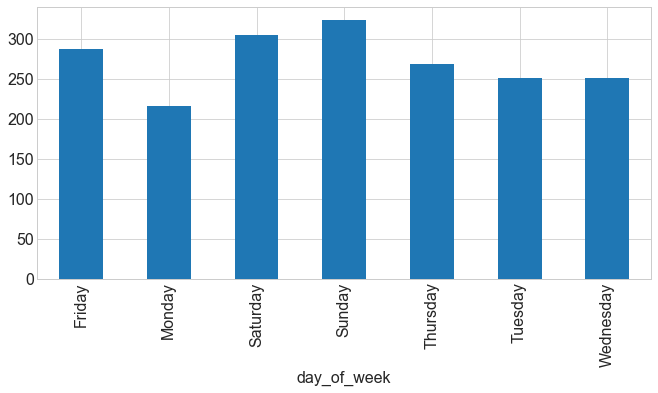

In [33]:
train.groupby('day_of_week').sales_total.mean().plot.bar()

<AxesSubplot:xlabel='month'>

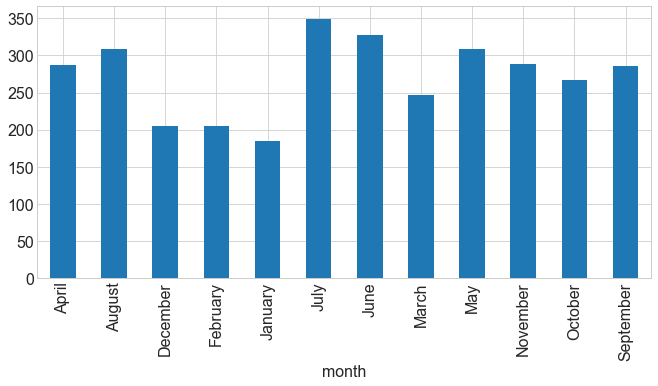

In [28]:
train.groupby('month').sales_total.mean().plot.bar()

<AxesSubplot:xlabel='sale_date'>

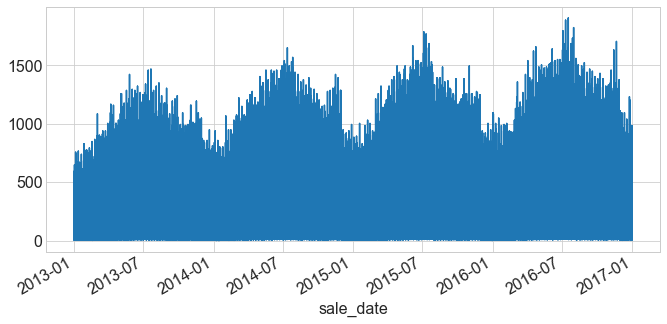

In [29]:
y.plot()

<AxesSubplot:xlabel='sale_date'>

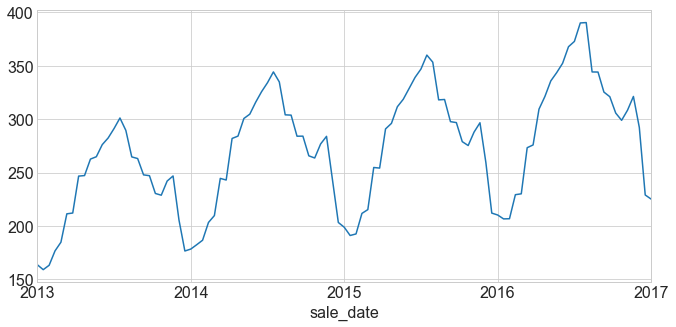

In [30]:
y.resample('2W').mean().plot()

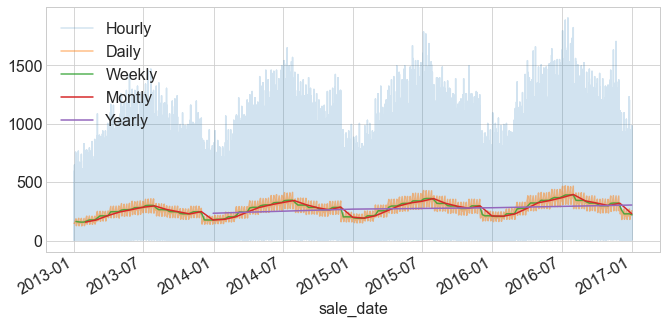

In [31]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

<AxesSubplot:xlabel='sale_date'>

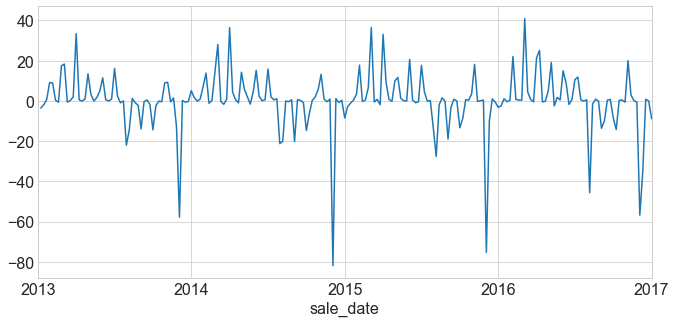

In [32]:
y.resample('W').mean().diff().plot()

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

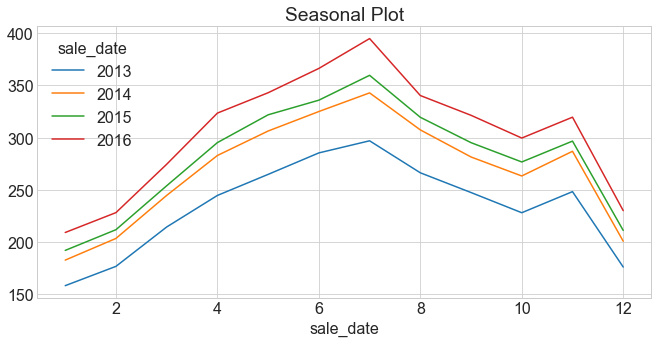

In [34]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

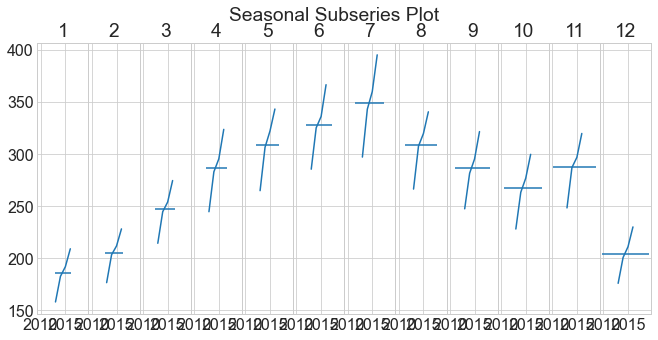

In [35]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
# fig.tight_layout()
fig.subplots_adjust(wspace=0)

[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

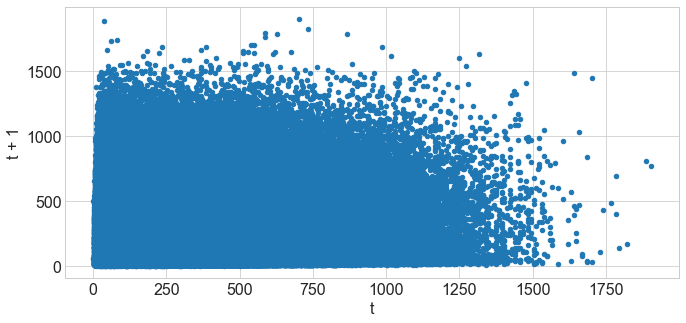

In [36]:
train['y(t + 1)'] = train.sales_total.shift(-1)
ax = train.plot.scatter(x='sales_total', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

,item_id,sale_amount,sale_id,store_id,store_zipcode,item_price,item_upc12,item_upc14,this_week,the_next_week
sale_date,,,,,,,,,,
2013-01-06,25.5,30.355667,455590.5,5.5,78224.8,5.1604,2.384688e+11,2.384688e+11,163.589167,159.981203
2013-01-13,25.5,29.686286,455597.0,5.5,78224.8,5.1604,2.384688e+11,2.384688e+11,159.981203,157.946720
2013-01-20,25.5,29.414286,455604.0,5.5,78224.8,5.1604,2.384688e+11,2.384688e+11,157.946720,158.545383
2013-01-27,25.5,29.513714,455611.0,5.5,78224.8,5.1604,2.384688e+11,2.384688e+11,158.545383,167.585014
2013-02-03,25.5,31.150571,455618.0,5.5,78224.8,5.1604,2.384688e+11,2.384688e+11,167.585014,176.455603
...,...,...,...,...,...,...,...,...,...,...
2016-12-04,25.5,49.016857,457018.0,5.5,78224.8,5.1604,2.384688e+11,2.384688e+11,263.768997,228.559894
2016-12-11,25.5,42.618571,457025.0,5.5,78224.8,5.1604,2.384688e+11,2.384688e+11,228.559894,229.298643
2016-12-18,25.5,42.682286,457032.0,5.5,78224.8,5.1604,2.384688e+11,2.384688e+11,229.298643,229.231000


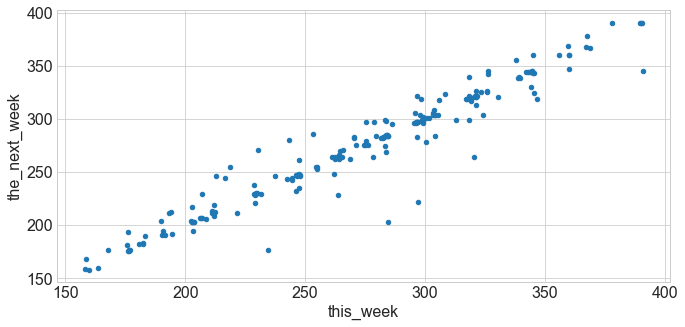

In [37]:
weekly = train.resample('W').mean().drop(columns='y(t + 1)')
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

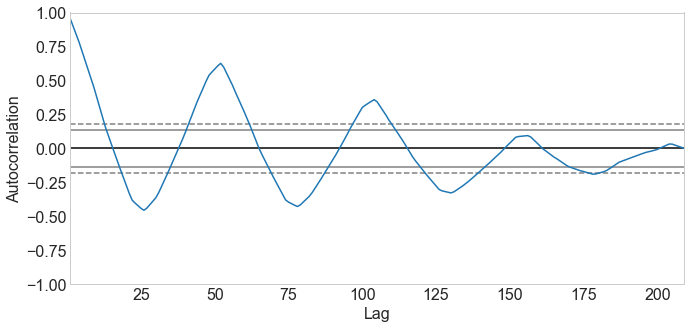

In [38]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

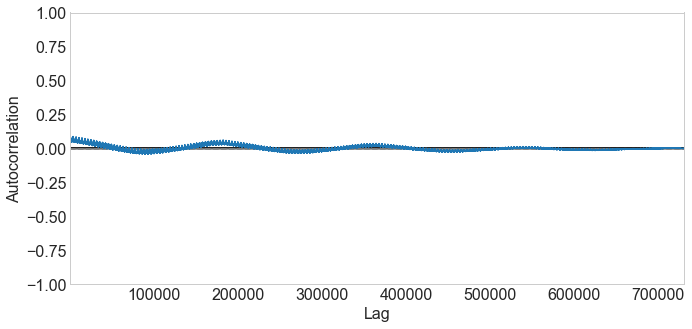

In [39]:
pd.plotting.autocorrelation_plot(y)

In [40]:
y = train.sale_amount.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})

<AxesSubplot:xlabel='sale_date'>

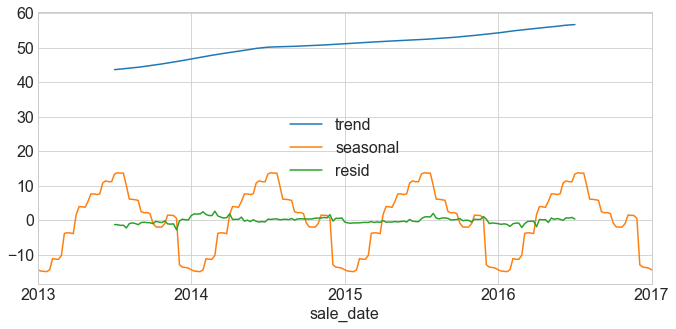

In [41]:
decomposition.iloc[:, 1:].plot()

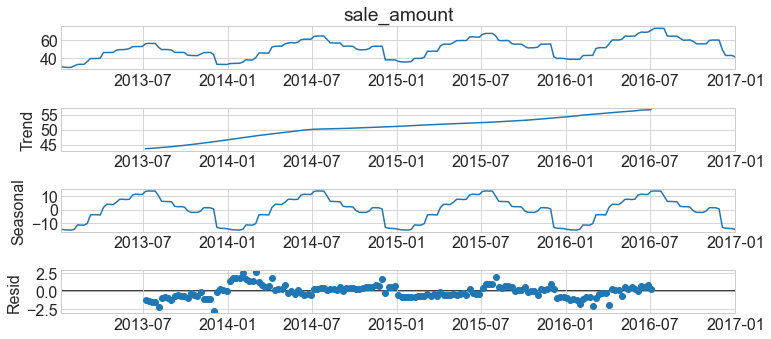

In [43]:
result.plot()
None